In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv('cardio_train.csv', sep=';', index_col=0)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
df['bmi'] = round(np.divide(df['weight'],np.power(df['height']*0.01,2)))

df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,22.0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,35.0
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,24.0
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,29.0
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.0


In [4]:
# calculate IQR for column bmi
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.9

outliers = df[(df['bmi'] < Q1 - threshold * IQR) | ( df['bmi'] > Q3 + threshold * IQR)]

# drop rows containing outliers
df = df.drop(outliers.index)

In [5]:
# outliers bmi

Q1, Q3 = np.quantile(df['bmi'], 0.25), np.quantile(df['bmi'], 0.75)
IQR = Q3 - Q1
threshold = 1.9
df = df[(df['bmi'] >= Q1 - threshold * IQR) & ( df['bmi'] <= Q3 + threshold * IQR)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68656 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          68656 non-null  int64  
 1   gender       68656 non-null  int64  
 2   height       68656 non-null  int64  
 3   weight       68656 non-null  float64
 4   ap_hi        68656 non-null  int64  
 5   ap_lo        68656 non-null  int64  
 6   cholesterol  68656 non-null  int64  
 7   gluc         68656 non-null  int64  
 8   smoke        68656 non-null  int64  
 9   alco         68656 non-null  int64  
 10  active       68656 non-null  int64  
 11  cardio       68656 non-null  int64  
 12  bmi          68656 non-null  float64
dtypes: float64(2), int64(11)
memory usage: 7.3 MB


In [6]:
df['bmi_label'] = pd.cut(x=df['bmi'], bins=[18.5,25,30,35,40,99],
                         labels = ['normal range', 'over-weight', 'obese (class 1)','obese (class 2)', 'obese (class 3)'])


In [7]:
df['bmi_label'].value_counts()

bmi_label
normal range       28869
over-weight        24188
obese (class 1)    10796
obese (class 2)     3830
obese (class 3)      332
Name: count, dtype: int64

In [8]:
# calculate IQR for column bmi
Q1 = df['ap_hi'].quantile(0.25)
Q3 = df['ap_hi'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5

outliers = df[(df['ap_hi'] < Q1 - threshold * IQR) | ( df['ap_hi'] > Q3 + threshold * IQR)]

# drop rows containing outliers
df = df.drop(outliers.index)

In [9]:
# calculate IQR for column bmi
Q1 = df['ap_lo'].quantile(0.25)
Q3 = df['ap_lo'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5

outliers = df[(df['ap_lo'] < Q1 - threshold * IQR) | ( df['ap_lo'] > Q3 + threshold * IQR)]

# drop rows containing outliers
df = df.drop(outliers.index)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63339 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          63339 non-null  int64   
 1   gender       63339 non-null  int64   
 2   height       63339 non-null  int64   
 3   weight       63339 non-null  float64 
 4   ap_hi        63339 non-null  int64   
 5   ap_lo        63339 non-null  int64   
 6   cholesterol  63339 non-null  int64   
 7   gluc         63339 non-null  int64   
 8   smoke        63339 non-null  int64   
 9   alco         63339 non-null  int64   
 10  active       63339 non-null  int64   
 11  cardio       63339 non-null  int64   
 12  bmi          63339 non-null  float64 
 13  bmi_label    62811 non-null  category
dtypes: category(1), float64(2), int64(11)
memory usage: 6.8 MB


In [11]:
df['ap_hi_cat'] = pd.cut(x=df['ap_hi'], bins=[50,120,129,139,180,250],
                         labels = ['healthy', 'elevated', 'stage 1 hypertension','stage 2 hypertension', 'hypertension crisis'])


df['ap_lo_cat'] = pd.cut(x=df['ap_lo'], bins=[50,81,82,90,120,250],
                         labels = ['healthy', 'elevated', 'stage 1 hypertension','stage 2 hypertension', 'hypertension crisis'])


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63339 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          63339 non-null  int64   
 1   gender       63339 non-null  int64   
 2   height       63339 non-null  int64   
 3   weight       63339 non-null  float64 
 4   ap_hi        63339 non-null  int64   
 5   ap_lo        63339 non-null  int64   
 6   cholesterol  63339 non-null  int64   
 7   gluc         63339 non-null  int64   
 8   smoke        63339 non-null  int64   
 9   alco         63339 non-null  int64   
 10  active       63339 non-null  int64   
 11  cardio       63339 non-null  int64   
 12  bmi          63339 non-null  float64 
 13  bmi_label    62811 non-null  category
 14  ap_hi_cat    63339 non-null  category
 15  ap_lo_cat    63339 non-null  category
dtypes: category(3), float64(2), int64(11)
memory usage: 6.9 MB


In [13]:
df = df.dropna()

<Axes: >

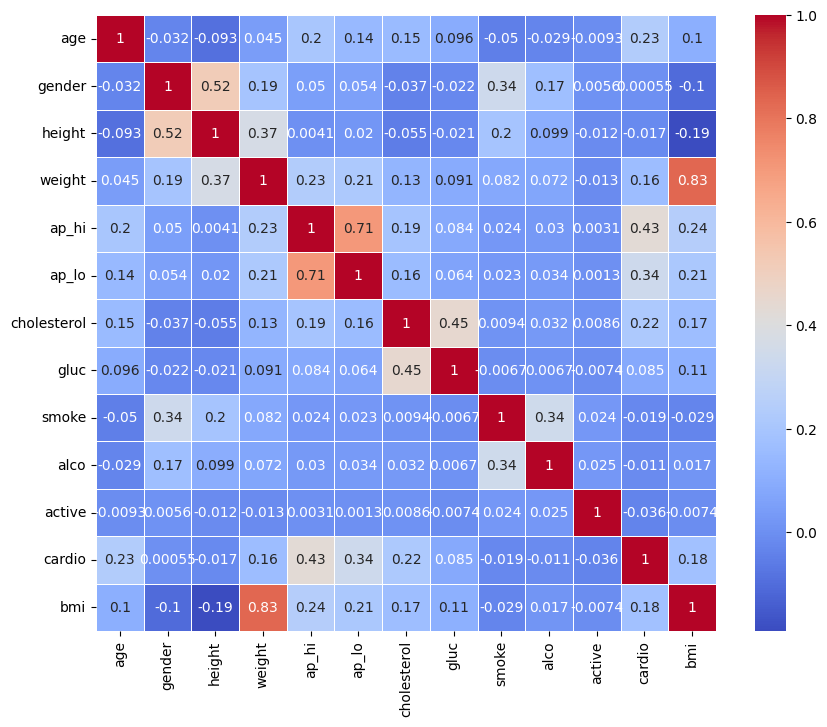

In [14]:
# heatmap

plt.figure(figsize=(10,8))
sns.heatmap(df.iloc[:, 0:13].corr(), annot=True, cmap='coolwarm', linewidths=0.5)

In [15]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_label,ap_hi_cat,ap_lo_cat
id,,,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,22.0,normal range,healthy,healthy
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,35.0,obese (class 1),stage 2 hypertension,stage 1 hypertension
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,24.0,normal range,stage 1 hypertension,healthy
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,29.0,over-weight,stage 2 hypertension,stage 2 hypertension
8,21914,1,151,67.0,120,80,2,2,0,0,0,0,29.0,over-weight,healthy,healthy


In [16]:
df_01 = df.drop(columns=['ap_hi', 'ap_lo', 'height', 'weight', 'bmi'])

df_01 = pd.get_dummies(df_01, columns = ["bmi_label", 'ap_hi_cat', 'ap_lo_cat', "gender"], drop_first=True)
df_01.head()

,age,cholesterol,gluc,smoke,alco,active,cardio,bmi_label_over-weight,bmi_label_obese (class 1),bmi_label_obese (class 2),bmi_label_obese (class 3),ap_hi_cat_elevated,ap_hi_cat_stage 1 hypertension,ap_hi_cat_stage 2 hypertension,ap_hi_cat_hypertension crisis,ap_lo_cat_elevated,ap_lo_cat_stage 1 hypertension,ap_lo_cat_stage 2 hypertension,ap_lo_cat_hypertension crisis,gender_2
id,,,,,,,,,,,,,,,,,,,,
0,18393,1,1,0,0,1,0,False,False,False,False,False,False,False,False,False,False,False,False,True
1,20228,3,1,0,0,1,1,False,True,False,False,False,False,True,False,False,True,False,False,False
2,18857,3,1,0,0,0,1,False,False,False,False,False,True,False,False,False,False,False,False,False
3,17623,1,1,0,0,1,1,True,False,False,False,False,False,True,False,False,False,True,False,True
8,21914,2,2,0,0,0,0,True,False,False,False,False,False,False,False,False,False,False,False,False
